In [6]:
"""
Chart Visualtions for stocks using seaborn library
"""

%run assets/libraries_import.ipynb
%run assets/functions.ipynb


link_usdt_data_frame = return_data_frame(return_data_query(crypto_list[0],from_period,to_period,interval)) #LINK/USDT data frame
dot_usdt_data_frame = return_data_frame(return_data_query(crypto_list[1],from_period,to_period,interval)) #DOT/USDT data frame
uniswap_data_frame = return_data_frame(return_data_query(crypto_list[2],from_period,to_period,interval)) #UNI/USDT data frame

In [3]:
link_usdt_data_frame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,26.446977,27.469375,25.141081,26.274486,26.274486,1.097785e+09
std,5.488748,5.650889,5.460357,5.510837,5.510837,4.275436e+08
min,17.787418,18.573771,15.549089,17.587616,17.587616,5.803661e+08
25%,20.509765,21.423813,19.363434,20.509371,20.509371,8.285989e+08
50%,26.655825,27.554596,25.669477,26.392433,26.392433,9.818458e+08
75%,31.623636,32.398068,29.894839,31.429160,31.429160,1.241650e+09
max,34.750072,38.161388,33.556553,34.837170,34.837170,2.719352e+09


In [4]:
dot_usdt_data_frame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,38.251718,39.578446,36.245301,37.988613,37.988613,1.637471e+09
std,9.100063,9.286630,8.865694,9.158440,9.158440,7.340236e+08
min,24.042261,25.018566,23.313160,24.050674,24.050674,7.446986e+08
25%,29.209766,29.864909,26.810624,28.510378,28.510378,1.193242e+09
50%,39.485596,41.204811,38.100279,39.207693,39.207693,1.390012e+09
75%,44.759854,45.957020,42.232076,44.648193,44.648193,1.876235e+09
max,53.877750,55.004974,52.254654,53.881733,53.881733,4.338985e+09


In [5]:
uniswap_data_frame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,21.105701,21.816293,20.152101,20.956151,20.956151,3.132488e+08
std,4.173963,4.244933,4.218872,4.135194,4.135194,1.400840e+08
min,14.156897,15.010784,13.444022,14.148139,14.148139,1.425108e+08
25%,17.186579,17.805795,15.958156,17.200514,17.200514,2.199742e+08
50%,21.308180,22.203385,20.564576,21.238249,21.238249,2.739112e+08
75%,25.146968,25.661903,24.173293,24.979548,24.979548,3.511362e+08
max,26.869978,28.431030,26.298906,26.855335,26.855335,7.786331e+08


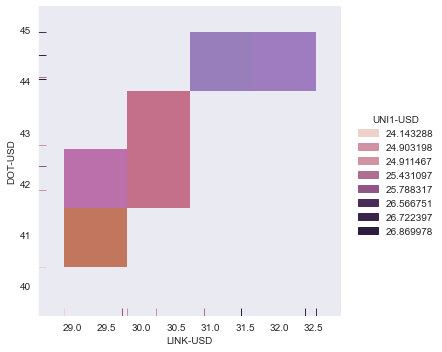

In [86]:
show_histogram_seaborn(return_grouped_data_frame('Open',crypto_list).head(8),crypto_list[0],crypto_list[1])

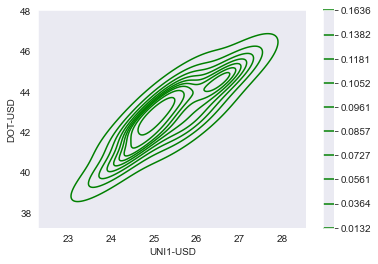

In [85]:
show_kernel_destiny_estimate_seaborn(return_grouped_data_frame('Close',crypto_list).head(8),crypto_list[2],crypto_list[1])

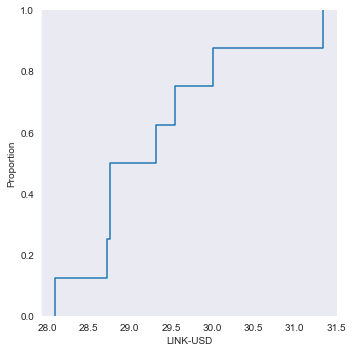

In [84]:
show_empirical_cumulative_distributions_seaborn(return_grouped_data_frame('Low',crypto_list).head(8))      

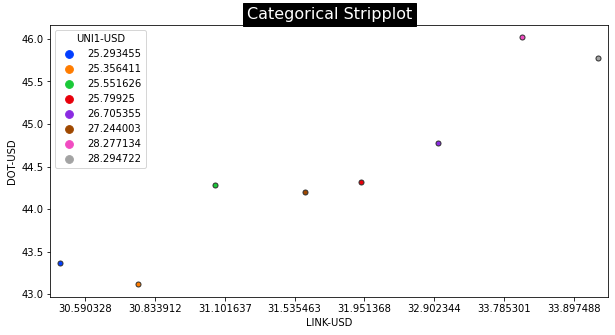

In [53]:
show_categorical_stripplot_seaborn(return_grouped_data_frame('High',crypto_list).head(8),"Categorical Stripplot")    

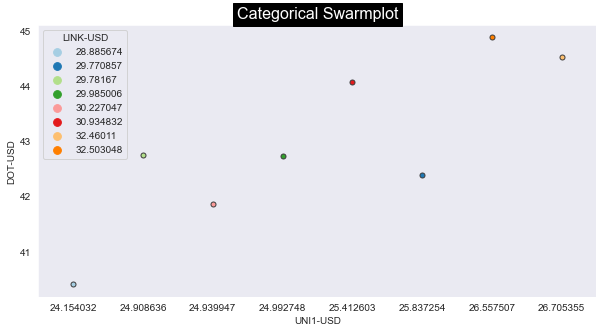

In [94]:
show_categorical_swarmplot_seaborn(return_grouped_data_frame('Adj Close',crypto_list).head(8),"Categorical Swarmplot")    

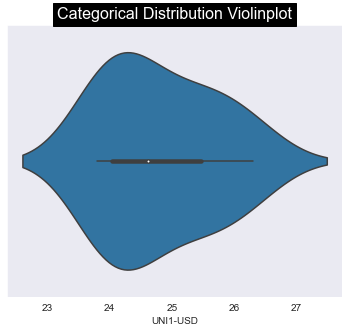

In [96]:
show_categorical_distribution_violinplot_seaborn(return_grouped_data_frame('Low',crypto_list).head(8),"Categorical Distribution Violinplot")

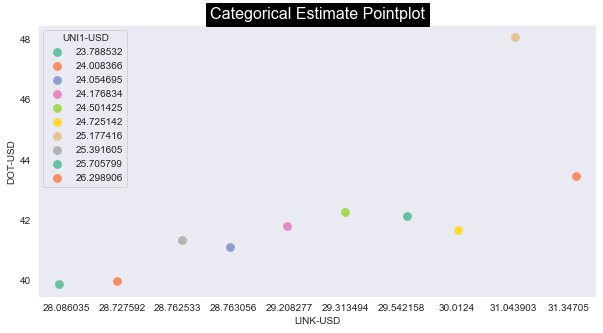

In [120]:
show_categorical_distribution_pointplot(return_grouped_data_frame('Low',crypto_list).head(10),"Categorical Estimate Pointplot")    

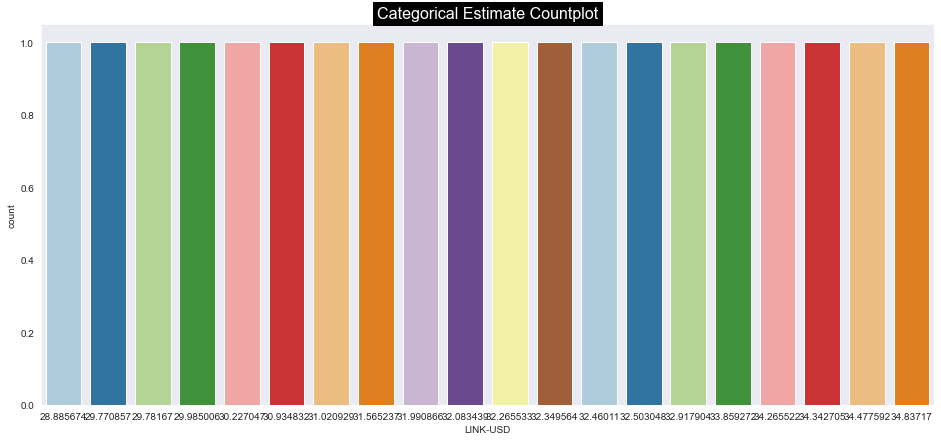

In [126]:
show_categorical_estimate_countplot(return_grouped_data_frame('High',crypto_list).head(10),"Categorical Estimate Countplot")

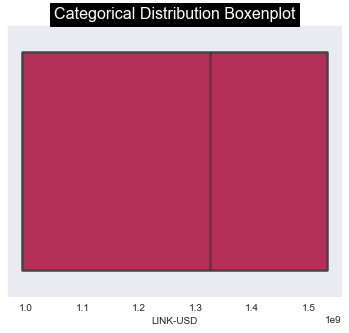

In [122]:
show_categorical_distribution_boxenplot(return_grouped_data_frame('Volume',crypto_list).head(8),"Categorical Distribution Boxenplot")    

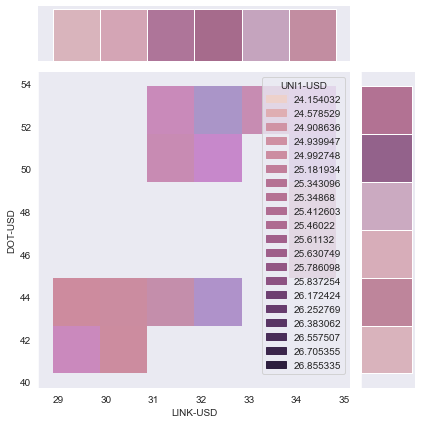

In [127]:
show_histogram_jointplot(return_grouped_data_frame('Close',crypto_list).head(20))

In [20]:
#Function to get ticker start timestamp
def get_tickr_startdate_timestamp(tickr):
    tickr = yf.Ticker(tickr)
    startDate = tickr.info['startDate']
    startDateObj = datetime.datetime.fromtimestamp(startDate)
    startDateTimeStamp = int(time.mktime(startDateObj.timetuple()))
    return startDateTimeStamp


#Function to get current timestamp
def get_current_timestamp():
    current_year = int(datetime.datetime.now().strftime("%Y"))
    current_month = int(datetime.datetime.now().strftime("%m"))
    current_date = int(datetime.datetime.now().strftime("%d"))
    current_hour = int(datetime.datetime.now().strftime("%H"))
    current_minute = int(datetime.datetime.now().strftime("%M"))
    current_second =int(datetime.datetime.now().strftime("%S")) 
    current_period = int(time.mktime(datetime.datetime(current_year,current_month,current_date,current_hour,current_minute,current_second).timetuple()))
    return current_period


btcDataFrame = return_data_frame(return_data_query("BTC-USD",get_tickr_startdate_timestamp("BTC-USD"),get_current_timestamp(),"1d"))


fig = go.Figure(
            data = [
                go.Candlestick(
                    x= btcDataFrame['Date'],
                    open=btcDataFrame['Open'],
                    high=btcDataFrame['High'],
                    low=btcDataFrame['Low'],
                    close=btcDataFrame['Close'],
                    name='market data'
                )
            ]
      )
fig.update_layout(xaxis_rangeslider_visible=False,template="plotly_dark")
fig.update_layout(yaxis_title="Bitcoin Price",xaxis_title="Date")
fig.update_yaxes(type="log")
fig.show()